## Dominos Case Study ##

### Code Author - Manoj Kumar ###

Innomatics Research labs Data Science Internship 2023 

### Problem Statement 🍕 ###

Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 


### Import required modules ###

Don't import unnecessary modules 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('E:\Mano@workspace\Datasets\diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.shape

(15000, 3)

In [4]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


### Data cleaning and analysing ### 

In [6]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [8]:
order_date = df['order_placed_at'].dt.day
order_date.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [9]:
order_day = df['order_placed_at'].dt.day_name()
order_day.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [10]:
df['order_date'] = order_date
df['order_day'] = order_day

In [11]:
df.head()

,order_id,order_placed_at,order_delivered_at,order_date,order_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday


In [12]:
df.tail()

,order_id,order_placed_at,order_delivered_at,order_date,order_day
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,27,Monday


### Visualizing ###

<AxesSubplot: title={'center': 'No.of orders in month (Datewise)'}, xlabel='Orders', ylabel='Date of month'>

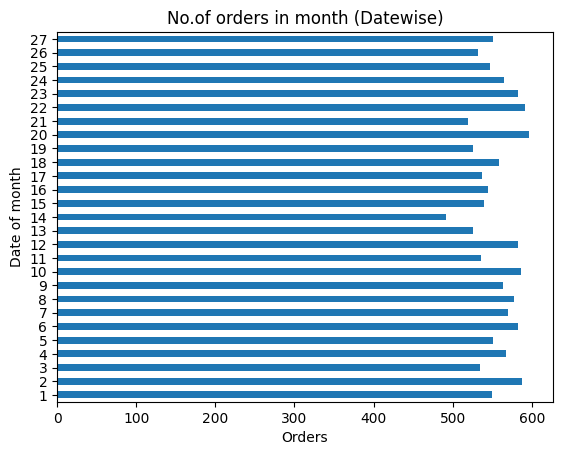

In [13]:
df['order_date'].value_counts().sort_index().plot(kind='barh',title='No.of orders in month (Datewise)',xlabel='Orders',ylabel='Date of month')

<AxesSubplot: title={'center': 'No.of orders (Daywise)'}, xlabel='Orders', ylabel='Day'>

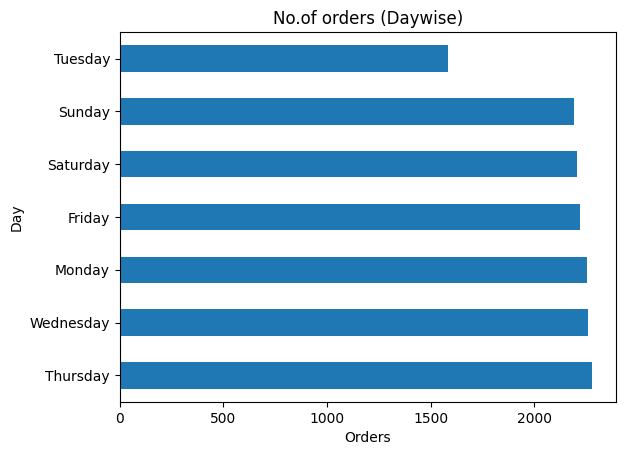

In [14]:
df['order_day'].value_counts().plot(kind='barh',title='No.of orders (Daywise)',xlabel='Orders',ylabel='Day')

### Finding Delivery Time ###

In [15]:
df['order_day'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_day, dtype: int64

In [16]:
df['order_day'].describe()

count        15000
unique           7
top       Thursday
freq          2280
Name: order_day, dtype: object

In [17]:
delivery_time = df['order_delivered_at'] - df['order_placed_at']

In [18]:
delivery_time = delivery_time.dt.total_seconds()/60
delivery_time

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Length: 15000, dtype: float64

In [19]:
df['delivery_time'] = delivery_time

In [20]:
df.head()

,order_id,order_placed_at,order_delivered_at,order_date,order_day,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984


In [21]:
df['delivery_time'].dtype

dtype('float64')

### Detecting Outliers ###

In [22]:
df['delivery_time'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time, dtype: float64

<AxesSubplot: >

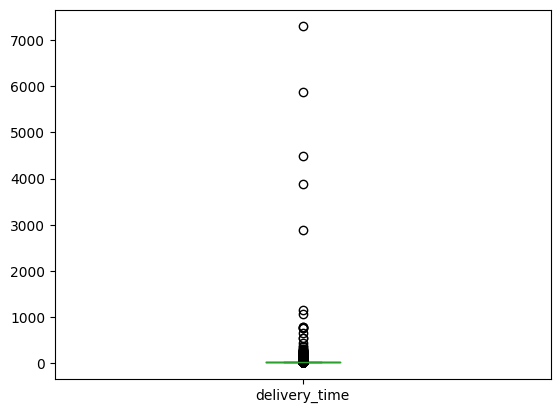

In [23]:
df['delivery_time'].plot(kind = 'box')

### Treating Outliers ###

In [24]:
clean_df =df[df['delivery_time'] < 40]

In [25]:
clean_df['delivery_time'].describe()

count    14669.000000
mean        16.992520
std          3.361265
min         15.000010
25%         15.266572
50%         15.763923
75%         17.099512
max         39.918947
Name: delivery_time, dtype: float64

<AxesSubplot: >

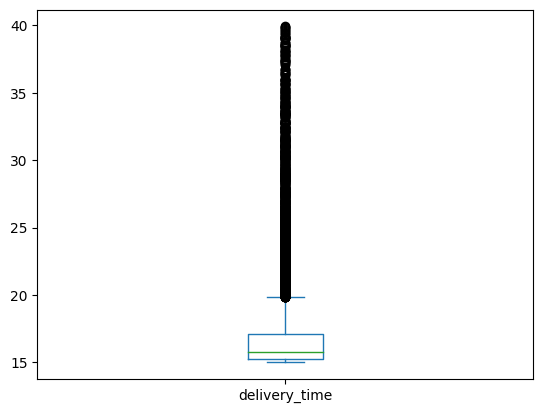

In [26]:
clean_df['delivery_time'].plot(kind = 'box')

### Finding performace of dominos ###

In [27]:
print('95th Percentile on Order Delivery time : ',clean_df['delivery_time'].quantile(0.95))

95th Percentile on Order Delivery time :  23.596276583333314


In [32]:
on_time_delivery = clean_df[clean_df['delivery_time'] < 31 ].shape
print('No. of on time deliveries :',on_time_delivery)

No. of on time deliveries : (14443, 6)


In [29]:
late_delivery = clean_df[clean_df['delivery_time'] > 31 ].shape
print('No. of late deliveries :', late_delivery)

No. of late deliveries : (226, 6)


In [30]:
total_delivery = df['delivery_time'].count()
print('Total Delivery is : ',total_delivery)

Total Delivery is :  15000


In [31]:
print('Delivery performance :',((15000-226)/15000)*100)

Delivery performance : 98.49333333333334


### Summary ###

Average delivery time(after treating outliers): 15.76<br>
Delivery performance : 98.49<br>
On time delivery : 14443<br>
Late delivery : 226<br>
95 Percentile on order delivery time : 23.59<br>

##### 95 percentile is less than 31 ##### <br>
### Kanav's pizza store is perform well ###


